In [1]:
import os
import random
import yaml
from PIL import Image
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from utilities.plot_boxes import plot_boxes
from utilities.load_boundingbox import load_bbx

In [2]:
root = 'datasets/wider_face/'
train_img_folder = f"{root}wider_train/WIDER_train/images/"
val_img_folder = f"{root}wider_val/WIDER_val/images/"
annotations_folder = f"{root}wider_face_split/wider_face_split/"

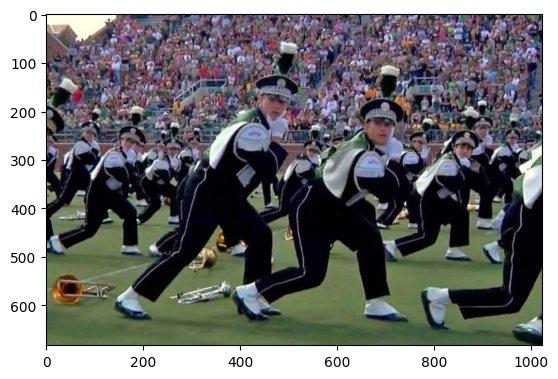

In [3]:
img = Image.open(f"{train_img_folder}0--Parade/0_Parade_marchingband_1_19.jpg")
plt.imshow(img)

In [4]:
os.listdir(annotations_folder)

['readme.txt',
 'wider_face_test.mat',
 'wider_face_test_filelist.txt',
 'wider_face_train.mat',
 'wider_face_train_bbx_gt.txt',
 'wider_face_val.mat',
 'wider_face_val_bbx_gt.txt']

In [5]:
train_bbx_path = f"{annotations_folder}wider_face_train_bbx_gt.txt"
val_bbx_path = f"{annotations_folder}wider_face_val_bbx_gt.txt"

In [6]:
train_annotations = load_bbx(train_bbx_path)
val_annotations = load_bbx(val_bbx_path)

train_keys = []
val_keys = []
for key in train_annotations.keys():
    train_keys.append(key)
for key in val_annotations.keys():
    val_keys.append(key)

In [7]:
def annotation_to_df(annotation, img_shape):
    cs, xs, ys, ws, hs = [], [], [], [], []
    
    h, w, _ = img_shape
    for box in annotation:
        cs.append(0)
        xs.append((box["x"] + box["w"] / 2.0) / w)
        ys.append((box["y"] + box["h"] / 2.0) / h)
        ws.append(box["w"] / w)
        hs.append(box["h"] / h)
        
    return pd.DataFrame({0:cs, 1:xs, 2:ys, 3:ws, 4:hs})

In [8]:
train_annotations

{'0--Parade/0_Parade_marchingband_1_849.jpg': [{'x': 449,
   'y': 330,
   'w': 122,
   'h': 149}],
 '0--Parade/0_Parade_Parade_0_904.jpg': [{'x': 361,
   'y': 98,
   'w': 263,
   'h': 339}],
 '0--Parade/0_Parade_marchingband_1_799.jpg': [{'x': 78,
   'y': 221,
   'w': 7,
   'h': 8},
  {'x': 78, 'y': 238, 'w': 14, 'h': 17},
  {'x': 113, 'y': 212, 'w': 11, 'h': 15},
  {'x': 134, 'y': 260, 'w': 15, 'h': 15},
  {'x': 163, 'y': 250, 'w': 14, 'h': 17},
  {'x': 201, 'y': 218, 'w': 10, 'h': 12},
  {'x': 182, 'y': 266, 'w': 15, 'h': 17},
  {'x': 245, 'y': 279, 'w': 18, 'h': 15},
  {'x': 304, 'y': 265, 'w': 16, 'h': 17},
  {'x': 328, 'y': 295, 'w': 16, 'h': 20},
  {'x': 389, 'y': 281, 'w': 17, 'h': 19},
  {'x': 406, 'y': 293, 'w': 21, 'h': 21},
  {'x': 436, 'y': 290, 'w': 22, 'h': 17},
  {'x': 522, 'y': 328, 'w': 21, 'h': 18},
  {'x': 643, 'y': 320, 'w': 23, 'h': 22},
  {'x': 653, 'y': 224, 'w': 17, 'h': 25},
  {'x': 793, 'y': 337, 'w': 23, 'h': 30},
  {'x': 535, 'y': 311, 'w': 16, 'h': 17},
  {

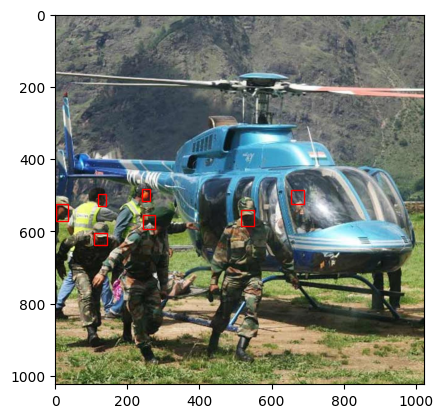

In [9]:
key = train_keys[random.randint(0, len(train_keys) - 1)]
img = np.array(Image.open(f"{train_img_folder}{key}"))
df = annotation_to_df(train_annotations[key], img.shape)
plot_boxes(img, df)

In [10]:
df

,0,1,2,3,4
0,0,0.520020,0.550293,0.034180,0.043945
1,0,0.019531,0.534180,0.033203,0.046875
2,0,0.125977,0.500000,0.021484,0.033203
3,0,0.123047,0.605957,0.033203,0.034180
4,0,0.254395,0.560547,0.030273,0.039062
5,0,0.246094,0.487793,0.021484,0.034180
6,0,0.656250,0.492676,0.033203,0.038086


In [11]:
def add_dataset(keys, annotations, img_folder, root, split, hold):
    if not os.path.exists(root):
        os.makedirs(root)
    if not os.path.exists(f"{root}images/{split}"):
        os.makedirs(f"{root}images/{split}")
        os.makedirs(f"{root}labels/{split}")

    count = 0
    for i, key in enumerate(tqdm(keys)):
        img = np.array(Image.open(f"{img_folder}{key}"))
        df = annotation_to_df(annotations[key], img.shape)
        if df.shape[0] > hold:
            count += 1
        else:
            Image.fromarray(img).save(f"{root}images/{split}/im{i}.jpg")
            df.to_csv(f"{root}labels/{split}/im{i}.txt", header=False, index=False, sep='\t')

    print(count)

In [12]:
len(train_keys), len(val_keys)

(12880, 3226)

In [13]:
add_dataset(train_keys, train_annotations, train_img_folder, "datasets/wider_face/WIDER_train/WIDER_train/images", "train", 200)

100%|████████████████████████████████████████████████████████████████████████████| 12880/12880 [03:15<00:00, 65.92it/s]

97


In [14]:
add_dataset(val_keys, val_annotations, val_img_folder, "datasets/wider_face/WIDER_val/WIDER_val/images", "val", 200)

100%|██████████████████████████████████████████████████████████████████████████████| 3226/3226 [00:45<00:00, 70.87it/s]

28
